In [1]:
# Install if not already installed
# !pip install pandas scikit-learn

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load Dataset
# Replace 'your_file.csv' with your file path or upload in Colab
ipl_data = pd.read_csv('ipl_dataset.csv')

# Step 3: Data Cleaning
# Drop rows where important fields are missing
ipl_data_clean = ipl_data.dropna(subset=['team1', 'team2', 'toss_winner', 'winner'])

# Step 4: Feature Engineering
features = ipl_data_clean[['team1', 'team2', 'toss_winner', 'toss_choice']]
target = ipl_data_clean['winner']

# Label Encoding for categorical columns
label_encoders = {}
for column in features.columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Label Encoding for target variable
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 6: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Prediction and Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


<ipython-input-1-49518202f103>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-1-49518202f103>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-1-49518202f103>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Accuracy: 0.52
Confusion Matrix:
[[ 2  0  0  0  0  0  0  1  1  1  0  0  0  0  0  1  0  0]
 [ 0  5  3  0  1  1  1  1  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  1  0  1  0  0  0  0  1]
 [ 0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0 16  0  0  3  0  1  1  1  1  0  0  0  0  1]
 [ 0  0  1  0  3  4  0  2  0  3  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0 17  0  0  1  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  2  0  4  0 11  2  2  2  0  1  0  0  0]
 [ 1  0  1  0  1  0  0  1  0  1 12  0  3  0  0  0  0  0]
 [ 2  0  0  0  3  0  0  1  0  1  1  4  1  0  0  0  0  0]
 [ 0  2  0  0  1  0  0  1  0  0  1  0 16  0  0  0  0  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0

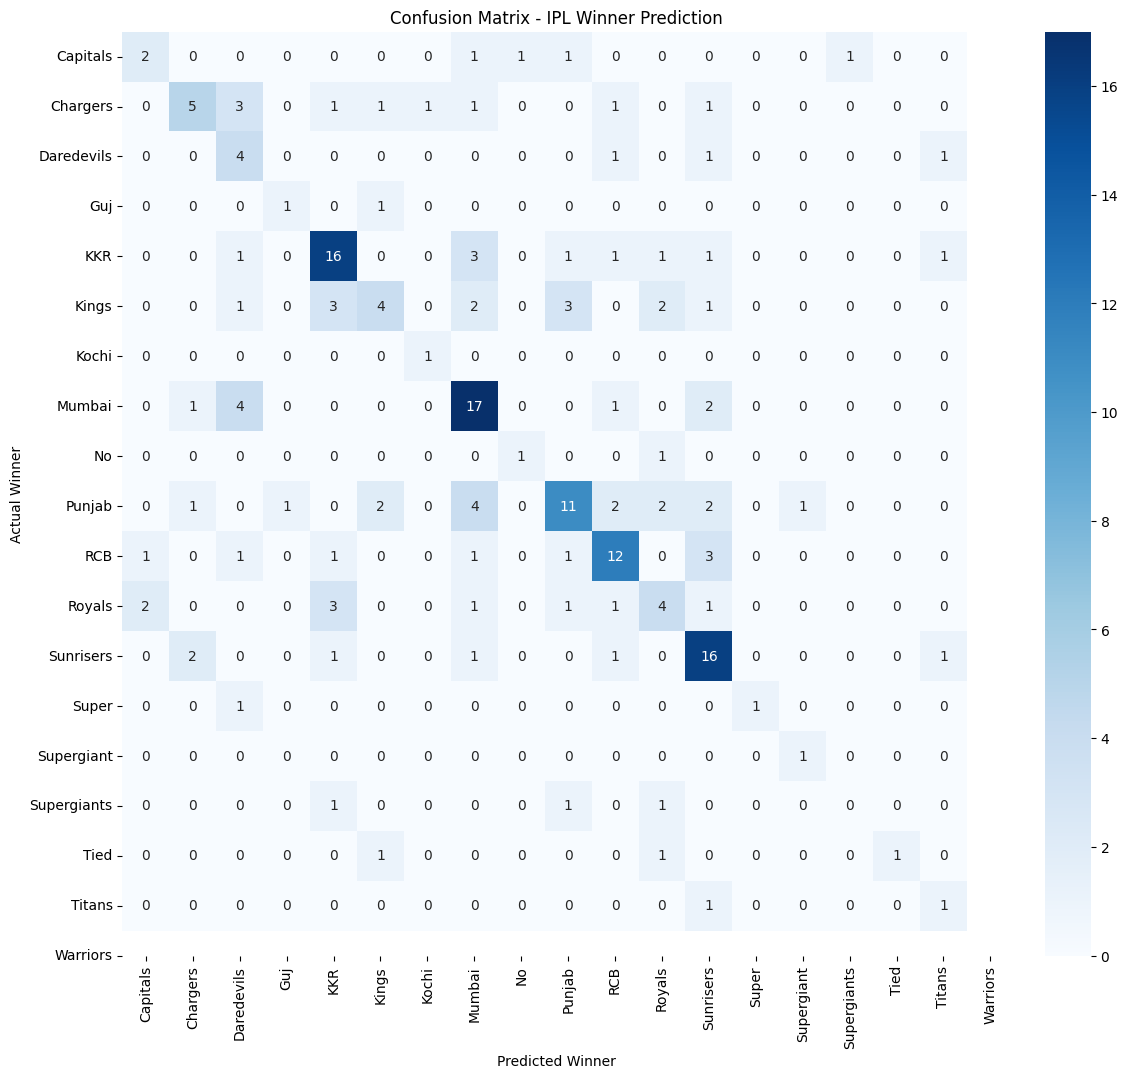

<ipython-input-2-b2ee30a01692>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


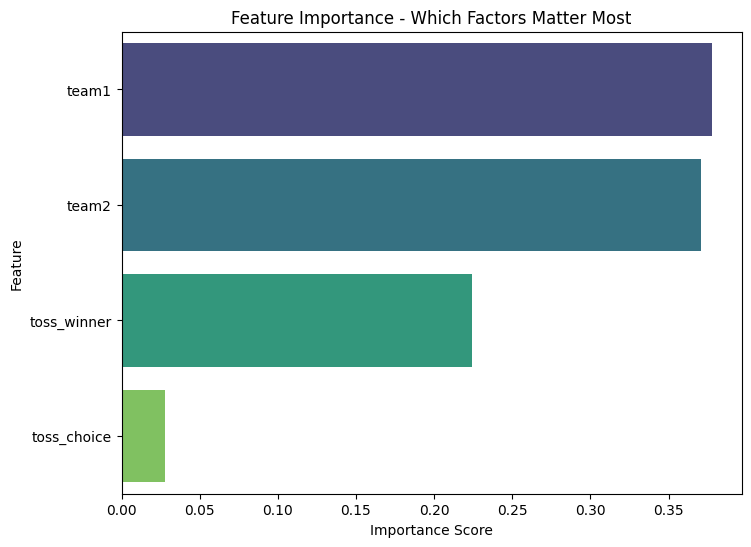

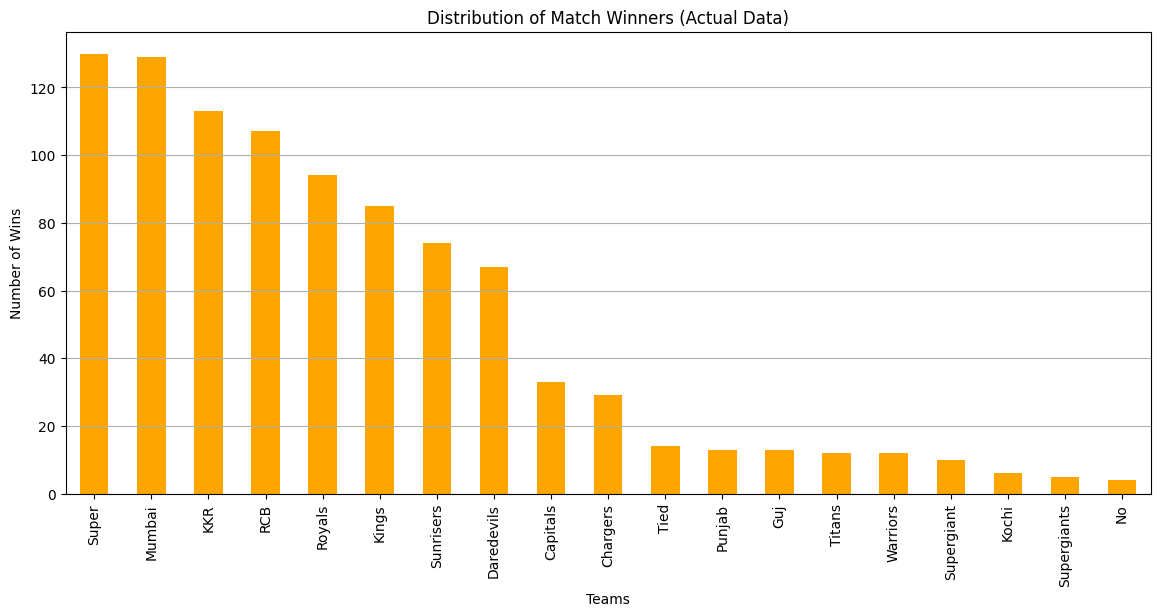

In [2]:
# Install required libraries if not installed
# !pip install matplotlib seaborn

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Visualization 1: Confusion Matrix Heatmap
# ----------------------------
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix - IPL Winner Prediction')
plt.xlabel('Predicted Winner')
plt.ylabel('Actual Winner')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# ----------------------------
# Visualization 2: Feature Importance Plot
# ----------------------------
feature_importances = model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title('Feature Importance - Which Factors Matter Most')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# ----------------------------
# Visualization 3: Class Distribution (Actual Winners)
# ----------------------------
plt.figure(figsize=(14, 6))
ipl_data_clean['winner'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Match Winners (Actual Data)')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
